In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier

import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
import numpy as np

from pmlb import fetch_data, classification_dataset_names
from scipy import stats

import random as rd
import math

import plotly

import warnings
warnings.filterwarnings('ignore')

In [2]:
meta = np.load("meta.npy")
#num_precent,sample_num,feature_num,class_num,bin_multi,imbalance
bin_index = np.array(np.where(meta[:,4]==0)[0],dtype=np.int)
multi_index = np.where(meta[:,4]==1)[0]
bin_meta = meta[bin_index,:]
multi_meta = meta[multi_index,:]



nonsmall_index = np.array(np.where(meta[:,1]>300)[0])
nonsmall_meta = meta[nonsmall_index,:]


In [3]:
len(nonsmall_index)

121

In [4]:
bv3 = np.load("lgbbv3.npy")
bv4 = np.load("lgbbv4.npy")
bv5 = np.load("lgbbv5.npy")
bv6 = np.load("lgbbv6.npy")
bv7 = np.load("lgbbv7.npy")

In [5]:
standard = bv6[4]
standard.shape

(166, 3, 6)

In [6]:
standard_o = []
standard_d = []
standard_r = []
for i in range(0,166):
    standard_o.append(standard[i][0])
    standard_d.append(standard[i][1])
    standard_r.append(standard[i][2])
np_standard_o = np.array(standard_o)
np_standard_d = np.array(standard_d)
np_standard_r = np.array(standard_r)

pd_standard_o = pd.DataFrame(np_standard_o,columns=["bias","var","avr_train_err","std_train_err","avr_test_err","std_test_err"])
pd_standard_d = pd.DataFrame(np_standard_d,columns=["bias","var","avr_train_err","std_train_err","avr_test_err","std_test_err"])
pd_standard_r = pd.DataFrame(np_standard_r,columns=["bias","var","avr_train_err","std_train_err","avr_test_err","std_test_err"])
pd_standard_o.describe()

,bias,var,avr_train_err,std_train_err,avr_test_err,std_test_err
count,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000
mean,0.257422,0.187576,0.169229,0.032542,0.294429,0.041157
std,0.215187,0.154163,0.183345,0.032548,0.200771,0.045245
min,0.000000,0.000000,0.000000,0.000000,0.012937,0.000000
25%,0.066833,0.055918,0.004489,0.002766,0.112721,0.009194
50%,0.217391,0.154797,0.110556,0.019996,0.269697,0.030819
75%,0.392665,0.285865,0.273721,0.055527,0.456128,0.055623
max,1.000000,0.710000,0.680000,0.175136,0.823636,0.300000


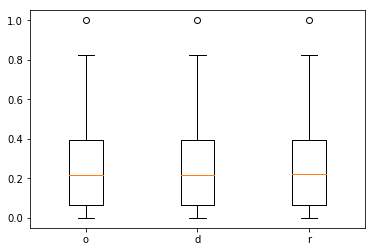

In [18]:
standard_odr = np.transpose(np.array([standard_o,standard_d,standard_r])[:,:,0])
plt.boxplot(standard_odr,labels=["o","d","r"])
plt.savefig("pic2.4.1.jpg")
plt.show()

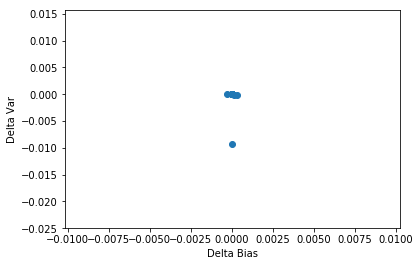

In [8]:
gap_od = np_standard_d - np_standard_o
gap_bias_od = gap_od[:,0]
gap_var_od = gap_od[:,1]
gap_loss_od = gap_od[:,4]

plt.scatter(gap_bias_od,gap_var_od)
plt.xlabel("Delta Bias")
plt.ylabel("Delta Var")
plt.show()

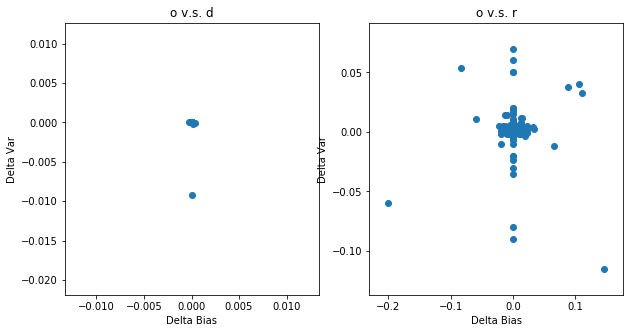

In [17]:
gap_od = np_standard_d - np_standard_o
gap_bias_od = gap_od[:,0]
gap_var_od = gap_od[:,1]
gap_loss_od = gap_od[:,4]

gap_or = np_standard_r - np_standard_o
gap_bias_or = gap_or[:,0]
gap_var_or = gap_or[:,1]
gap_loss_or = gap_or[:,4]


plt.figure(figsize=[10,5])
plt.subplot(121)
plt.scatter(gap_bias_od,gap_var_od)
plt.xlabel("Delta Bias")
plt.ylabel("Delta Var")
plt.title("o v.s. d")
plt.subplot(122)
plt.scatter(gap_bias_or,gap_var_or)
plt.xlabel("Delta Bias")
plt.ylabel("Delta Var")
plt.title("o v.s. r")
plt.savefig("pic2.4.2.jpg")
plt.show()

In [10]:
pd.DataFrame(gap_var_od).describe()

,0
count,166.000000
mean,-0.000058
std,0.000720
min,-0.009276
25%,0.000000
50%,0.000000
75%,0.000000
max,0.000000


In [11]:
len(gap_bias_od)

166

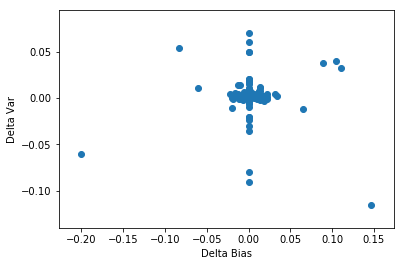

In [12]:
gap_or = np_standard_r - np_standard_o
gap_bias_or = gap_or[:,0]
gap_var_or = gap_or[:,1]
gap_loss_or = gap_or[:,4]

plt.scatter(gap_bias_or,gap_var_or)
plt.xlabel("Delta Bias")
plt.ylabel("Delta Var")
plt.show()

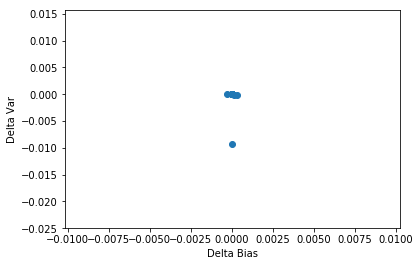

In [13]:
gap_od = gap_od[nonsmall_index,:]
gap_bias_od = gap_od[:,0]
gap_var_od = gap_od[:,1]
gap_loss_od = gap_od[:,4]

plt.scatter(gap_bias_od,gap_var_od)
plt.xlabel("Delta Bias")
plt.ylabel("Delta Var")
plt.show()

In [14]:
len(gap_bias_od)

121

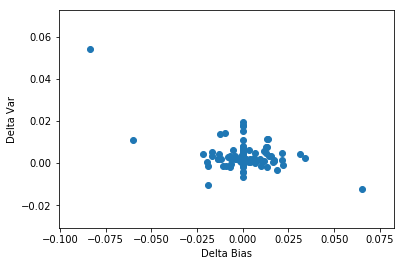

In [15]:
gap_or = gap_or[nonsmall_index,:]
gap_bias_or = gap_or[:,0]
gap_var_or = gap_or[:,1]
gap_loss_or = gap_or[:,4]

plt.scatter(gap_bias_or,gap_var_or)
plt.xlabel("Delta Bias")
plt.ylabel("Delta Var")
plt.show()

In [16]:
print(stats.ttest_ind(gap_bias_od,[0]*len(gap_bias_od)))
print(stats.ttest_ind(gap_var_od,[0]*len(gap_var_od)))
print(stats.ttest_ind(gap_loss_od,[0]*len(gap_loss_od)))


print(stats.ttest_ind(gap_bias_or,[0]*len(gap_bias_or)))
print(stats.ttest_ind(gap_var_or,[0]*len(gap_var_or)))
print(stats.ttest_ind(gap_loss_or,[0]*len(gap_loss_or)))

Ttest_indResult(statistic=0.5219772041761913, pvalue=0.6021676111246022)
Ttest_indResult(statistic=-1.0337755772283812, pvalue=0.3022816462286527)
Ttest_indResult(statistic=-1.0129106431184927, pvalue=0.3121229133998051)
Ttest_indResult(statistic=0.46603644334056477, pvalue=0.6416120954578829)
Ttest_indResult(statistic=5.164016613561705, pvalue=5.076009586361474e-07)
Ttest_indResult(statistic=7.629741997356099, pvalue=5.510518651893896e-13)
